<a href="https://colab.research.google.com/github/Ajay-Ravikumarrajan/Machine_Learning/blob/main/DTC/DTC_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn

In [6]:
col_names=['pregnant','glucose','bp','skin','insulin','bmi','pedigree','age','label']
data=pd.read_csv('/content/diabetes.csv', header= 1,names=col_names)
print(data.shape)
data.head()

(767, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [7]:
data.isnull().sum()

,0
pregnant,0
glucose,0
bp,0
skin,0
insulin,0
bmi,0
pedigree,0
age,0
label,0


In [8]:
feature_cols=['pregnant','insulin','bmi','age','glucose','bp','pedigree']
x=data[feature_cols]
y=data.label

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
display(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(613, 7)

(613,)

(154, 7)

(154,)

In [10]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=5)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print('y_pred: ',y_pred)

y_pred:  [1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 1 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0
 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 1 0 1]


In [12]:
conf_matrix=metrics.confusion_matrix(y_test,y_pred)
print('Confusion Matrix: ',conf_matrix)
Accuracy_score=metrics.accuracy_score(y_test,y_pred)
print('Accureacy Score: ',Accuracy_score)

Confusion Matrix:  [[80 14]
 [26 34]]
Accureacy Score:  0.7402597402597403


<Axes: xlabel='Predicted', ylabel='Actual'>

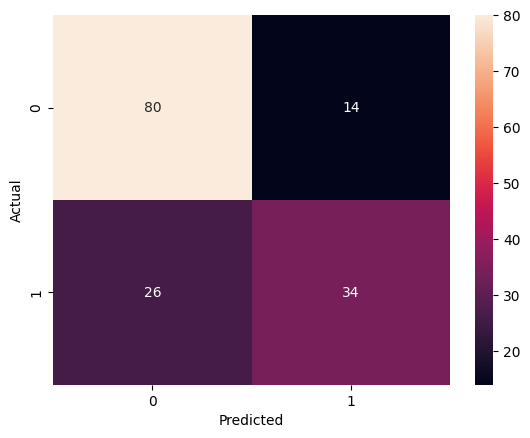

In [13]:
conf_matrix=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(conf_matrix,annot=True)